LOGISTIC REGRESSION

Dataset used to perform the Logistic Regression :- https://www.kaggle.com/uciml/pima-indians-diabetes-database The dataset is provided by the National Institute of Diabetes and Digestive and Kidney Diseases. Using this dataset we will be predicting whether or not the patient has a diabetes, based on the diagnostic factors, attributes included in the dataset.

METADATA INFORMATION :- THE dataset contains attributes such Number of Pregnancies patient has had, their BMI, Age, Insulin Levels, Age hich will be our independent variables for the model, whereas the target/Observed Variable will be Outcome which has binary variables 0 and 1. Using this we will be performing binary classification i.e Logistic Regression.


IMPORTING LIBRARIES AND REQUIRED PACKAGES

In [1]:
# Import pandas
import numpy as np #linear algebra
from scipy.stats import mode
import scipy as sc
import pandas as pd # For data processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns #Data Visualization
import sklearn

LOADING DATASET : PIMA INDIAN DIABETES

In [2]:
#Read in the file
Diabetes= pd.read_csv("/Users/dhanashri/Documents/diabetes2.csv")
#Display the data 
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Columns in the dataset
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#Checking the dimensions of the dataset
Diabetes.shape

(768, 9)

In [5]:
#Print Info
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Exploratory Data Analysis

In [6]:
#Checking for missing and null values in each column
## a number And also find if there are any columns with 
# null/missing values

print(Diabetes[~Diabetes.applymap(np.isreal).all(1)])
null_columns=Diabetes.columns[Diabetes.isnull().any()]
print(Diabetes.isnull().any(axis=1)[null_columns].head())

# Below result shows that there no null values in the data 

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Series([], dtype: bool)


Exploratory Data Analysis

In [7]:
#Summary of the Dataset 
Diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Finding the zero values in the columns

(Diabetes == 0).sum(axis=0)
# We can see that Insulin highest number of zero values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
#We will use 'median' to replace 0 for all columns except for 'Insulin' as diff between mean and median is too much
Diabetes['Pregnancies'].replace(0,Diabetes['Pregnancies'].median(),inplace=True)
Diabetes['Glucose'].replace(0,Diabetes['Glucose'].median(),inplace=True)
Diabetes['BloodPressure'].replace(0,Diabetes['BloodPressure'].median(),inplace=True)
Diabetes['SkinThickness'].replace(0,Diabetes['SkinThickness'].median(),inplace=True)
Diabetes['BMI'].replace(0,Diabetes['BMI'].median(),inplace=True)
Diabetes['Insulin'].replace(0,Diabetes['Insulin'].mean(),inplace=True)

In [10]:
#Checking again if all the zero values are replaced
(Diabetes == 0).sum(axis=0)
# The result shows that zero values are now replaced

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
# Checking the data distribution for the target variable 'Outcome' against other variables in the dataset
Diabetes.groupby(['Outcome']).count()

# The ratio is almost 1:2 in favor of class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


DATA VISUALIZATION

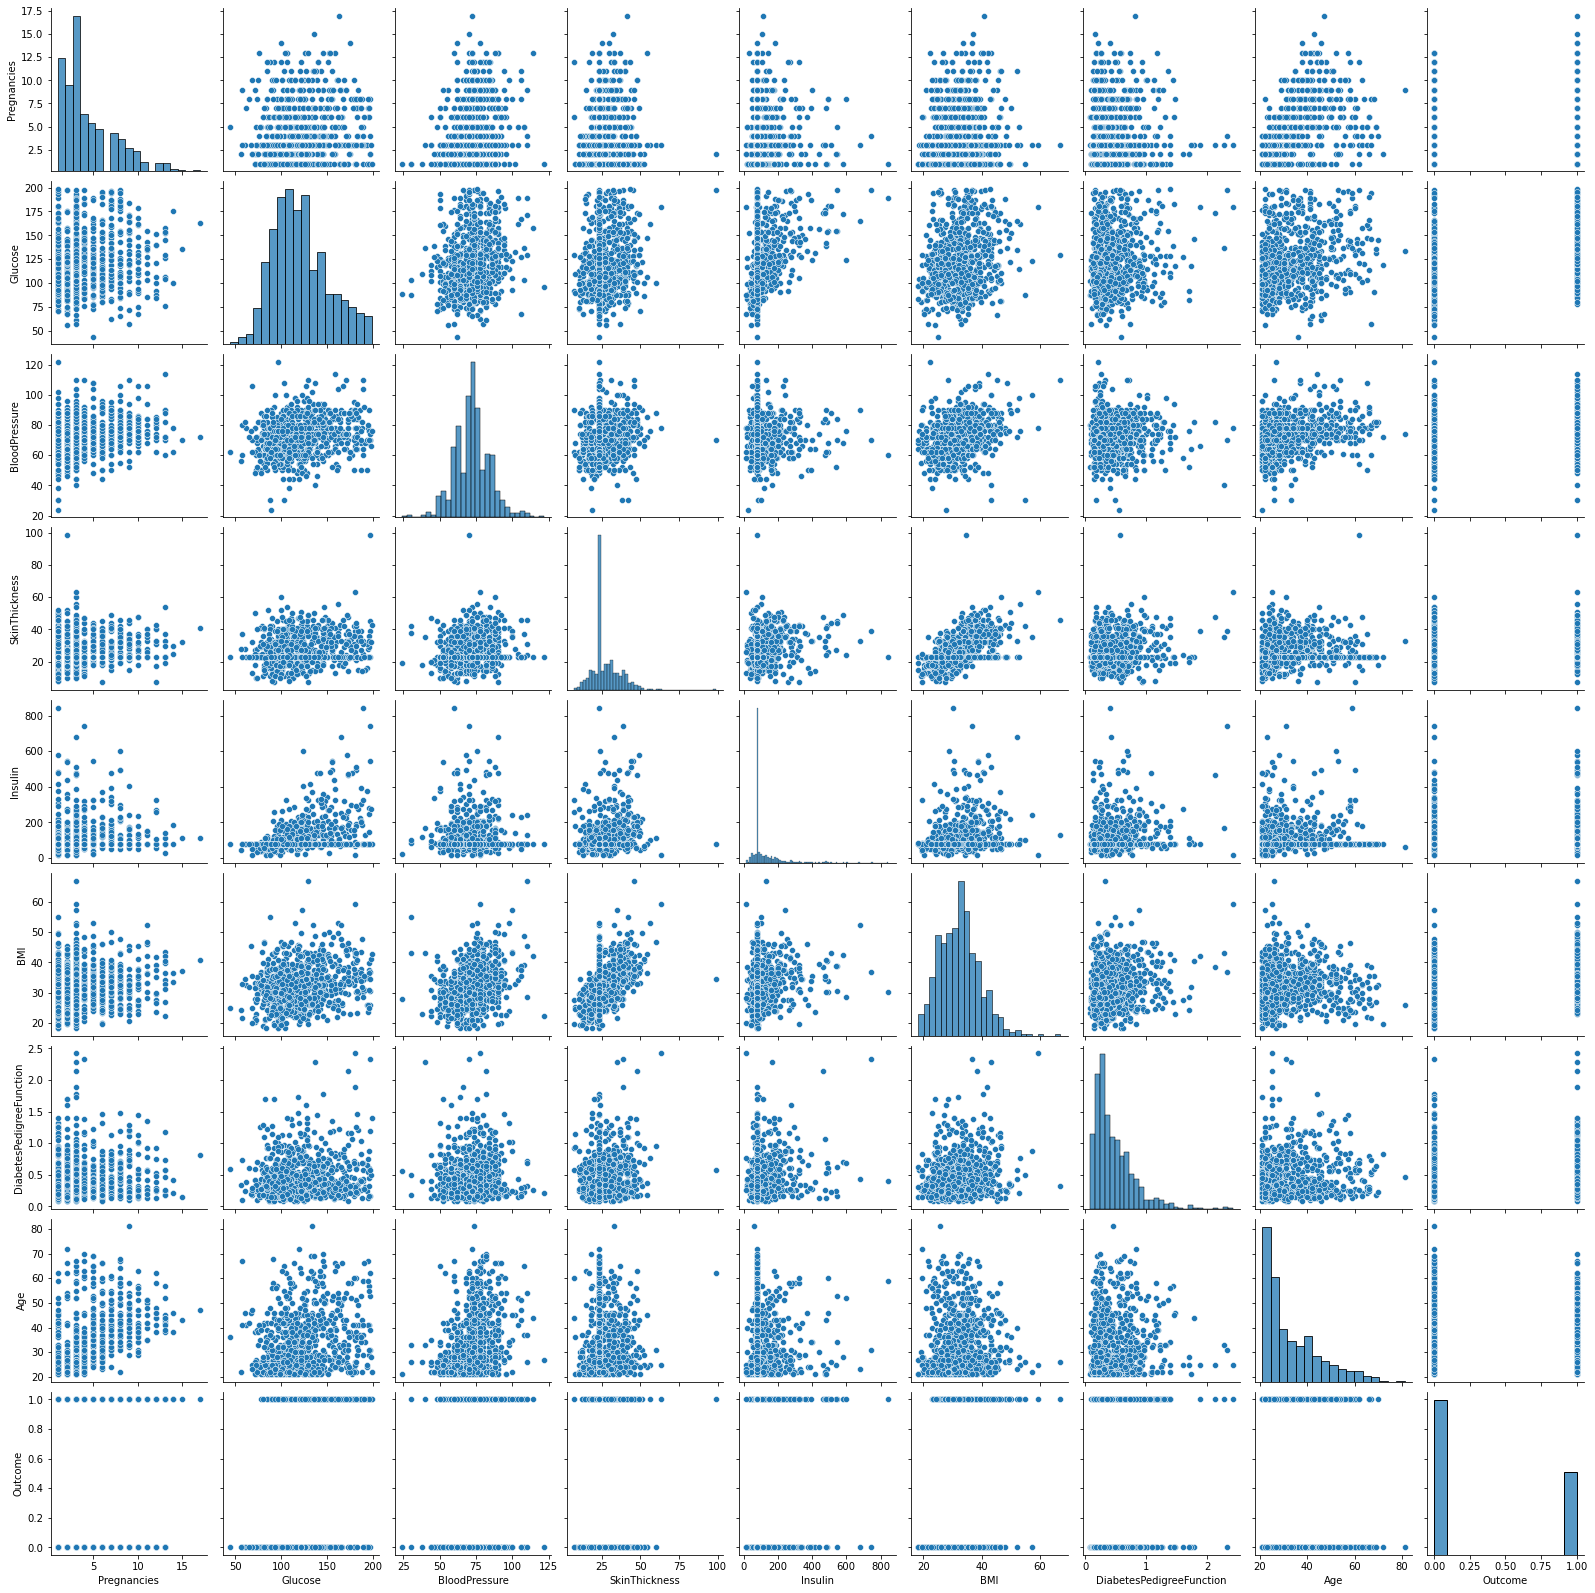

In [12]:
# Pairplot using sns

sns.pairplot(Diabetes)

Data for Insulin and DiabetesPedigreeFunction is skewed

The mean for Insulin is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right
Rhe mean for DiabetesPedigreeFunction is 0.47 while the median is 0.37 which clearly indicates a long tail on the right

Some of the attributes preg, test, pedi, age looks like they may have an exponential distribution
Age probably should have a normal distribution, but due to the constraints on the data collection may have lead to the skewed distribution.
There is no obvious relationship between age and onset of diabetes.
There is no obvious relationship between pedi function and onset of diabetes.


In [13]:
#Checking corelation between the columns
Diabetes.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.017330,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.397017,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,0.006385,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.217854,0.546951,0.142977,0.054514,0.189065
Insulin,-0.017330,0.397017,0.006385,0.217854,1.000000,0.189850,0.157806,0.038652,0.179185
BMI,0.080540,0.231400,0.281132,0.546951,0.189850,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.157806,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,0.038652,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.179185,0.312249,0.173844,0.238356,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

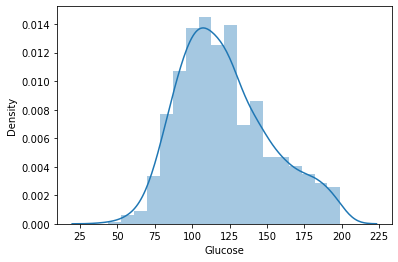

In [14]:
# Data for BMI, Glucose and BloodPressure has normal distribution
sns.distplot(Diabetes['Glucose'],kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

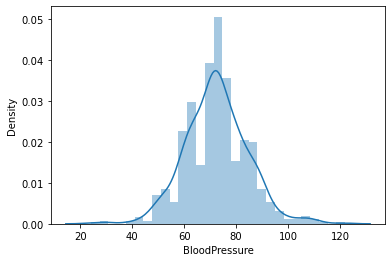

In [15]:
sns.distplot(Diabetes['BloodPressure'],kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

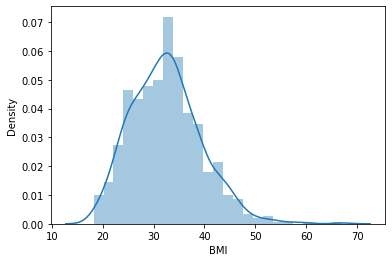

In [16]:
sns.distplot(Diabetes['BMI'],kde=True)

<AxesSubplot:>

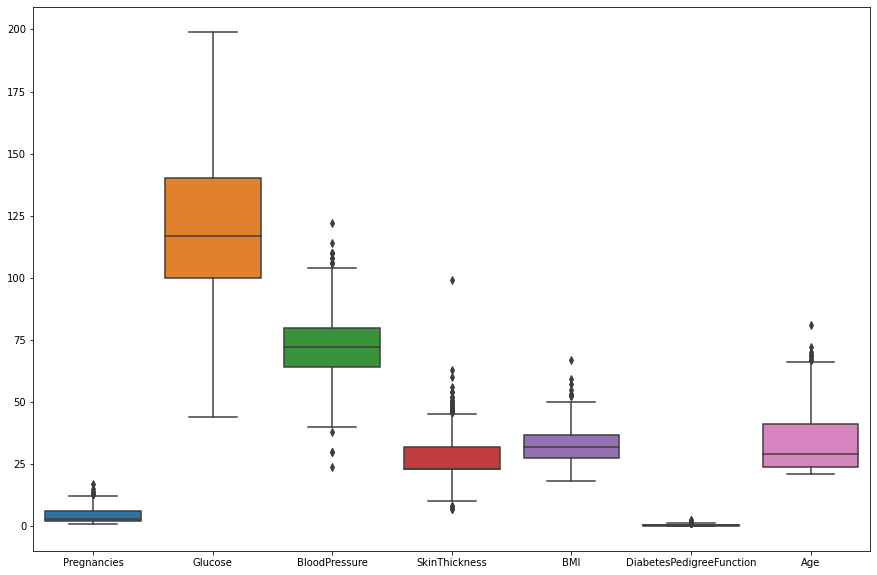

In [17]:
#Checking the outliers for the columns exlcuding 'Insulin'
plt.subplots(figsize=(15,10))
sns.boxplot(data=Diabetes.drop(['Insulin','Outcome'],axis=1))

<AxesSubplot:>

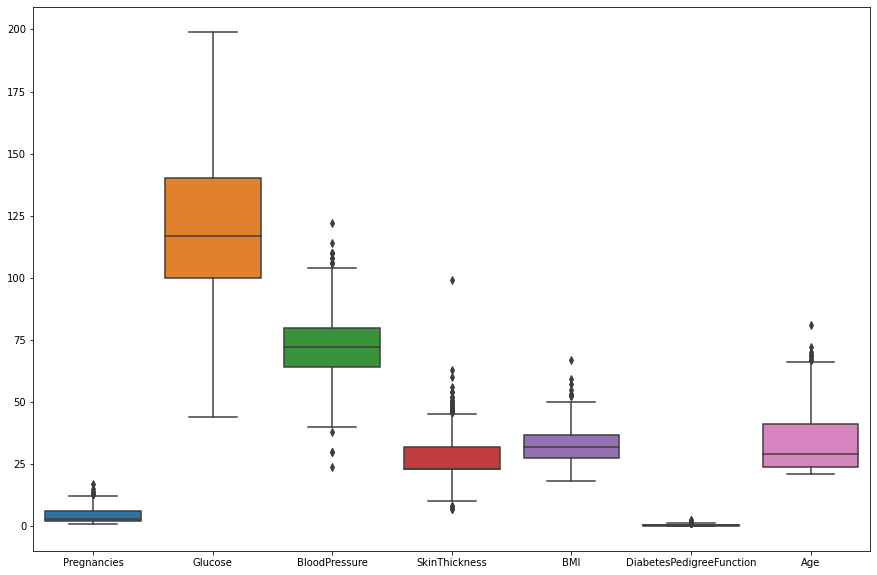

In [18]:
#Now lets check the boxplot for 'Insulin' as it has maximum values
plt.subplots(figsize=(15,10))
sns.boxplot(data=Diabetes.drop(['Insulin','Outcome'],axis=1))

LOGISTIC MODEL using SKlearn 

In [19]:
#loading packages for Logistic Regression
from sklearn.linear_model import LogisticRegression


#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split

# To calculate accuracy measures and confusion matrix
from sklearn import metrics

In [30]:
#Model prediction 
# Seperating the target variable and predictors
x=Diabetes.drop('Outcome',axis=1)
y=Diabetes['Outcome']

#Splitting the dataset into training and testing 
#For training the ratio is 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
type(x_train)

model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print('Accuracy = ',model_score)
print(metrics.confusion_matrix(y_test,y_predict))

Accuracy =  0.7857142857142857
[[87 12]
 [21 34]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Model prediction 
# Seperating the target variable and predictors
X = Diabetes.drop(['Outcome'], axis = 1)

# “Yes”, “No” for diabetes(Dependent variable)
Y = Diabetes.loc[:,"Outcome"].values

# Splitting the data into ratio of 70:30 training and test data set
test_size = 0.20
# Random number seeding for reapeatability of the code
seed =1
#Splitting Data into train-test where 70% will be used for training #and rest 30% for Testing our model built on test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [32]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=200)

In [33]:
# Fit the mode 
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [34]:
# Predict
predicted = logreg.predict(X_test)

In [35]:
#Checking the accuracy
print("Test accuracy: {} ".format(logreg.score(X_test, y_test)))

Test accuracy: 0.7727272727272727 


In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predicted)
cf_matrix

array([[88, 11],
       [24, 31]])

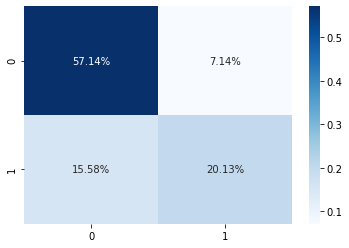

In [37]:
#Plot for the confusion matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [ ]:
y_test